<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.519638  73.910468  37.329545  ...  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148  ...   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  ...  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  ...  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662  ...  212.152152  212.163047 -0.010895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005  ...  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  ...  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  ...  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  ...  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  ...  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.519638  73.910468  37.329545  ...  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148  ...   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  ...  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  ...  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662  ...  212.152152  212.163047 -0.010895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005  ...  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  ...  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  ...  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  ...  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  ...  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.519638,73.910468,37.329545,0.020425,186.780076,186.761648,0.018428
1,0.0,1.0,35.157891,20.579459,32.277148,-0.030604,97.983894,98.012296,-0.028402
2,0.0,2.0,36.687864,28.821690,68.086653,0.008591,143.604798,143.594859,0.009938
3,0.0,3.0,61.428916,54.986372,70.503032,0.008391,196.926711,196.919829,0.006882
4,0.0,4.0,22.309370,87.711359,92.142662,-0.011239,212.152152,212.163047,-0.010895
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.635728,27.647150,73.800005,-0.038957,202.043927,202.083509,-0.039582
249996,999.0,246.0,76.563436,68.975071,24.380652,0.001247,179.920406,179.921655,-0.001250
249997,999.0,247.0,33.759988,47.302958,83.288525,0.004508,174.355980,174.345450,0.010529
249998,999.0,248.0,52.387696,75.985786,90.043604,0.008379,228.425466,228.414964,0.010502


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    65.519638  73.910468  37.329545  ...  186.780076  186.761648  0.018428
      1.0    35.157891  20.579459  32.277148  ...   97.983894   98.012296 -0.028402
      2.0    36.687864  28.821690  68.086653  ...  143.604798  143.594859  0.009938
      3.0    61.428916  54.986372  70.503032  ...  196.926711  196.919829  0.006882
      4.0    22.309370  87.711359  92.142662  ...  212.152152  212.163047 -0.010895
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  90.635728  27.647150  73.800005  ...  202.043927  202.083509 -0.039582
      246.0  76.563436  68.975071  24.380652  ...  179.920406  179.921655 -0.001250
      247.0  33.759988  47.302958  83.288525  ...  174.355980  174.345450  0.010529
      248.0  52.387696  75.985786  90.043604  ...  228.425466  228.414964  0.010502
      249.0  48.355174  62.515433  27.268084  ...  148.152176  148.137020  0.015156

[250000 rows x 7 columns]

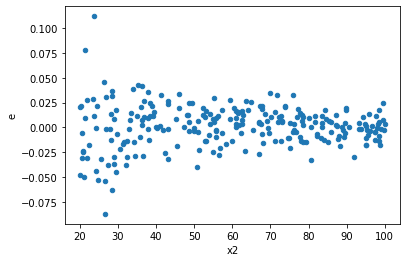

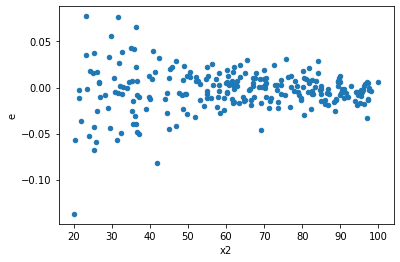

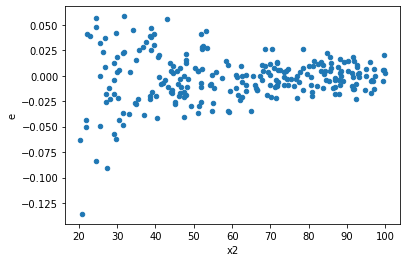

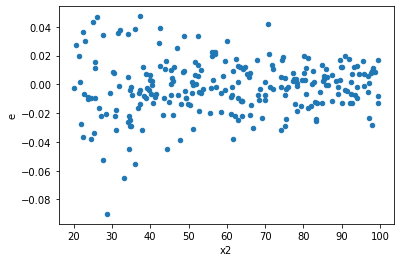

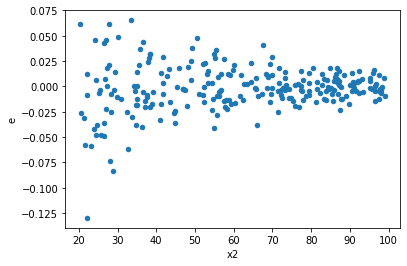

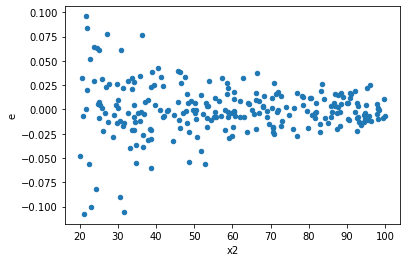

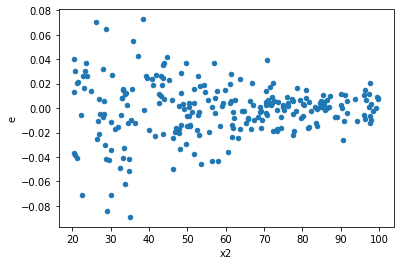

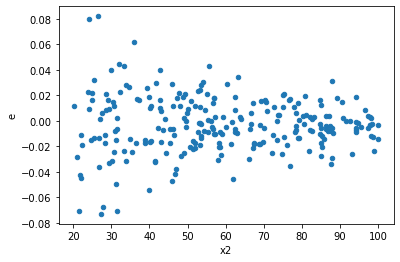

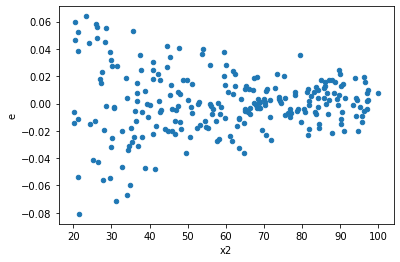

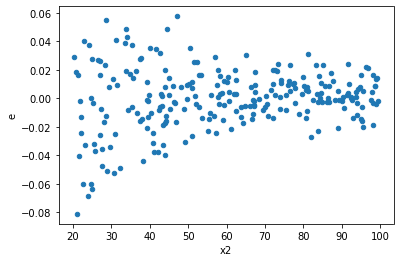

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.08475961778736758,0.014553772952573603,0.000873810492653274,0.00015003889641828456,0.17170644857181824,2.9202211046320396e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.1059459427333195,0.01275422145536353,0.0010922262137455618,0.00013148681912745908,0.12038423677504725,6.7415180339191485e-22,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.10728119980274266,0.011905376242009503,0.0011059917505437387,0.00012273583754648972,0.11097355607412904,2.894595397961823e-23,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.060605442918758703,0.016512526483866433,0.0006247983806057598,0.00017023223179243744,0.27245946384718933,6.356178397768462e-10,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.099278623319746,0.008062392574532316,0.0010234909620592371,8.311744922198263e-05,0.08120975397257295,1.0071578725206883e-28,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.14162348234153888,0.01752504397336431,0.0014600359004282358,0.0001806705564264362,0.1237439136759888,1.928722993913276e-21,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.09884190813434304,0.010768398895902642,0.001018988743653021,0.00011101442160724374,0.10894568001729132,1.4072256335971744e-23,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.0818348113622903,0.01825310947918586,0.0008436578490957763,0.00018817638638335938,0.2230482257529458,1.6347240644635152e-12,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.09761677346556492,0.013478891639697555,0.0010063584893357208,0.0001389576457700779,0.1380796676756822,1.1813809557767394e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64